<a href="https://colab.research.google.com/github/sajid8222/Deep_learning-Notes-with-Practical-Example/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    U

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
## import some basic lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

In [4]:
# Binary Classification Problem!
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## Divide the dataset into independent and dependent features

X= dataset.iloc[:,3:13]
y= dataset.iloc[:,13] # all the rows with dependent feature

In [56]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [64]:
X.shape

(10000, 11)

In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## Feature engineering

In [9]:
# prompt: Do feature engineering in the above dataset

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [75]:
X.shape

(10000, 11)

In [77]:
# Check and fix the shape of X
if len(X.shape) > 2:
    X = X.reshape(X.shape[1:])  # Remove the first dimension
if X.shape[0] != y.shape[0]:
    X = X.transpose()  # Ensure the rows align with y

# Verify shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Shape of X: (10000, 11)
Shape of y: (10000,)


In [76]:
y.shape

(10000,)

In [78]:
# spliting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
# prompt: X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# I want to check the shape of these

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [80]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [82]:
X_train.shape

(8000, 11)

In [59]:
X_train.shape

(8000, 11)

In [83]:
X_test.shape

(2000, 11)

In [15]:
X_train.shape

(8000, 11)

In [84]:
## Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Changed 'tensorfow' to 'tensorflow'
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [112]:
### Lets initialize the ANN
classifier=Sequential()


In [113]:
### Adding the input layer
classifier.add(Dense(units=11,activation='relu')) #Dense=> fully connetec layer | units => inputs =11


In [114]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [115]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [116]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))


In [117]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [118]:
import tensorflow as tf # Make sure tensorflow is imported in this cell as well

opt = tf.keras.optimizers.Adam(learning_rate=0.001) # Use 'tf' alias for consistency

In [119]:
## Early stopping


early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [120]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7494 - loss: 0.6043 - val_accuracy: 0.7955 - val_loss: 0.4650
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8036 - loss: 0.4848 - val_accuracy: 0.7955 - val_loss: 0.4535
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4568 - val_accuracy: 0.7955 - val_loss: 0.4424
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8012 - loss: 0.4567 - val_accuracy: 0.7955 - val_loss: 0.4310
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8006 - loss: 0.4509 - val_accuracy: 0.7970 - val_loss: 0.4237
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8051 - loss: 0.4431 - val_accuracy: 0.8080 - val_loss: 0.4162
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8144 - loss: 0.4230 - val_accuracy: 0.8152 - val_loss: 0.4116
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8138 - loss: 0.4192 - 

In [121]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

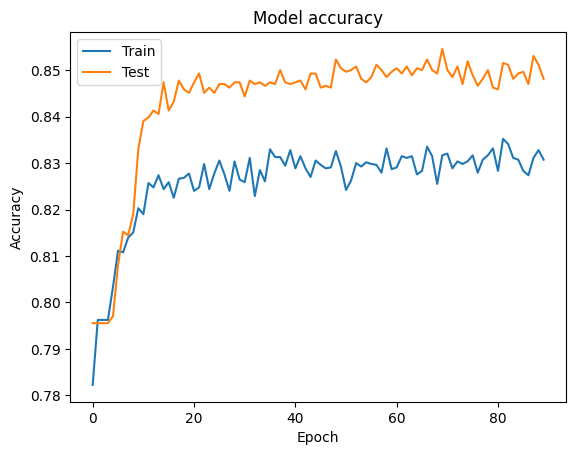

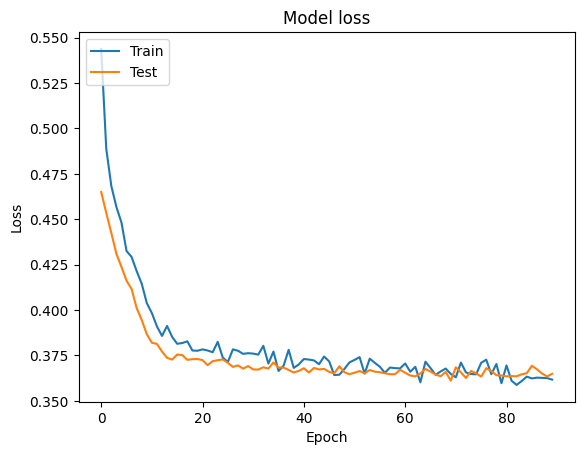

In [122]:
# prompt: generate code to summarize history for accuracy in plot

# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [96]:
# Making the prediction the TEST SET RESUTLS
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [97]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [98]:
cm

array([[1528,   67],
       [ 213,  192]])

In [100]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [101]:
score

0.86

In [102]:
## lets see weights
classifier.get_weights()

[array([[-0.00798513, -0.22751142,  0.57787204,  0.46680015,  0.01846497,
         -0.05630107, -0.11015598, -0.24313293,  0.05546674, -0.13278295,
          0.06332324],
        [-0.09272772,  0.46348768,  0.2711056 ,  0.49387276, -0.52223593,
         -0.57868445, -0.3680866 ,  0.9385168 ,  0.19837005,  0.62445736,
          0.32147285],
        [-0.08955073,  0.14172436,  0.24265088,  0.38212255, -0.00376819,
          0.19814037, -0.31580484, -0.15231706,  0.1320867 ,  0.25981826,
          0.43867424],
        [-0.5497494 , -0.5141038 , -0.26588184, -0.00752971,  0.55066186,
          0.1957267 ,  0.5694704 ,  0.29635817,  0.53592414,  0.1950658 ,
         -0.5775252 ],
        [ 0.91656417, -0.45429903,  0.666726  , -0.62873447,  0.3291978 ,
          0.02034021,  0.01271606, -0.6640996 ,  0.94139934,  0.40155527,
         -0.39705408],
        [-0.14444074, -0.21677433,  0.05919517, -0.19036867,  0.13477576,
         -0.3105007 ,  0.17859803,  0.07520144, -0.17276843, -0.0805759